# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
!pip install tweepy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import requests
import os
import numpy as np
from timeit import default_timer as timer


%matplotlib inline

In [2]:
dir(tweepy)

['API',
 'AppAuthHandler',
 'BadRequest',
 'Cache',
 'Client',
 'Cursor',
 'FileCache',
 'Forbidden',
 'HTTPException',
 'List',
 'Media',
 'MemoryCache',
 'NotFound',
 'OAuth1UserHandler',
 'OAuth2AppHandler',
 'OAuth2BearerHandler',
 'OAuth2UserHandler',
 'OAuthHandler',
 'Paginator',
 'Place',
 'Poll',
 'ReferencedTweet',
 'Response',
 'Space',
 'Stream',
 'StreamResponse',
 'StreamRule',
 'StreamingClient',
 'TooManyRequests',
 'TweepyException',
 'Tweet',
 'TwitterServerError',
 'Unauthorized',
 'User',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'api',
 'auth',
 'cache',
 'client',
 'cursor',
 'errors',
 'list',
 'media',
 'mixins',
 'models',
 'pagination',
 'parsers',
 'place',
 'poll',
 'space',
 'streaming',
 'tweet',
 'user',
 'utils']

In [3]:
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
folder = 'dog_rating'
if not os.path.exists(folder):
    os.makedirs(folder)
with open(os.path.join(folder,URL.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
df_image = pd.read_csv('dog_rating/image-predictions.tsv', sep= '\t')
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

unfortunately,I wasn't given acces to twitter Api so I will get the Json file from direct download

In [ ]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException  as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
with open('tweet-json.txt', 'r') as json_f:
    liste = []
    for line in json_f:
        lines = line.replace('\n', '')
        liste.append(lines)

tweet_id = []
retweet_count = []
favourite_count = []
creation_date = []
language = []


line_length = len(liste)
for i in range(line_length):
    dictio = json.loads(liste[i])
    
    tweet_id.append(dictio['id'])
    creation_date.append(dictio['created_at'])
    retweet_count.append(dictio['retweet_count'])
    favourite_count.append(dictio['favorite_count'])
    language.append(dictio['lang'])
    
    
info = {'tweet_id': [],'timestamp':[], 'retweet_count':[], 'favorite_count':[],'language':[]}    
info.update({'tweet_id':tweet_id,'timestamp':creation_date, 'retweet_count': retweet_count, 'favorite_count' : favourite_count,'language':language})
Api_df = pd.DataFrame(info)
Api_df.head()

,tweet_id,timestamp,retweet_count,favorite_count,language
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8853,39467,en
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6514,33819,en
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4328,25461,en
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8964,42908,en
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9774,41048,en


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
sum(df.duplicated())


0

In [8]:
df_image.duplicated().sum()

0

In [9]:
Api_df.duplicated().sum()

0

<AxesSubplot:>

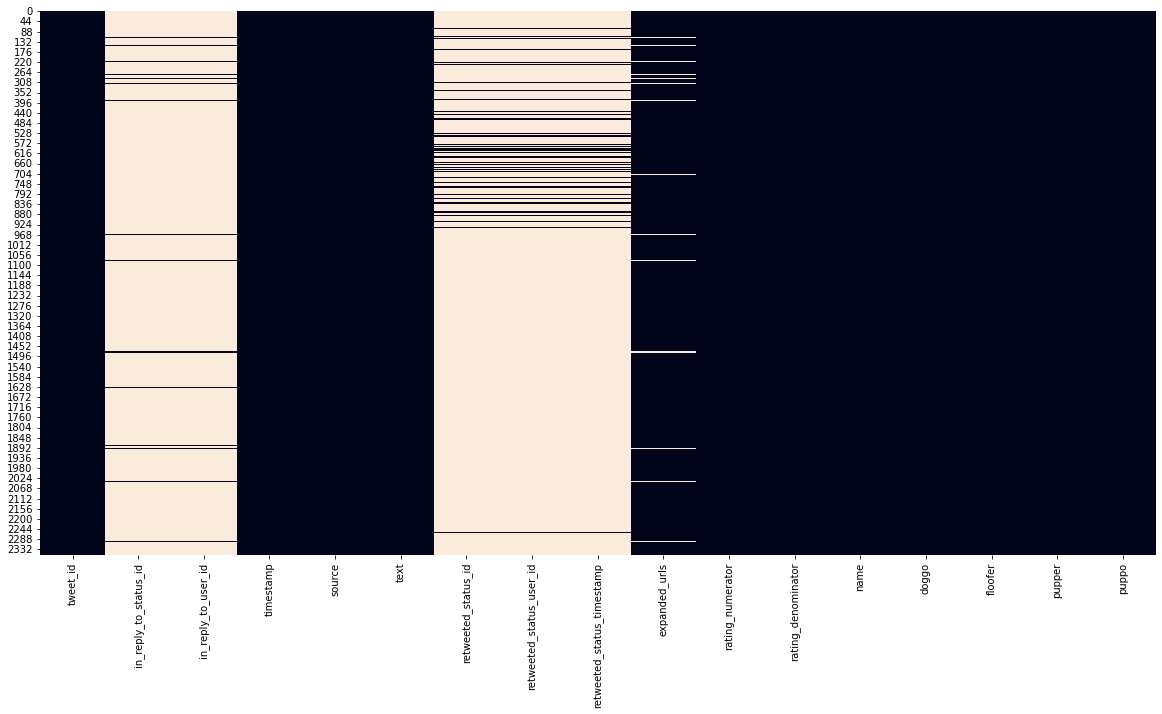

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
Api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   timestamp       2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
 4   language        2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [13]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
Api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [16]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [18]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues
1.unnecessary columns in df like in_reply_to_status_id ,in_reply_to_user_id..

2.Drop all rows with retweets because we only want original tweets

3.incorrect data types like timestamp and tweet_id are not in the right format.

4.dogs names aren't homogenous , some starts with capitals and others not

5.irrelevent values in columns like name (Dogs without names, but given names of “a” or “an” instead of “None.”)

6.irrelevant values in rating_numerator and rating_denominator such as denominator=0 or numerator =1776 ...

7.tweets with missing data in the expanded_urls.

8.The source column looks messy and clutters the table





### Tidiness issues
1.df and API_df can be gathered in one dataframe

2."doggo"	"floofer"	"pupper"	"puppo" can be all in one column called step_dog

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
df_copy=df.copy()
Api_df_copy=Api_df.copy()
df_image_copy=df_image.copy()

### Issue #1:

#### Define:
drop retweets and replies and let only originals

#### Code

In [21]:
retweet = df_copy[pd.notnull(df_copy['retweeted_status_id'])].index
replies= df_copy[pd.notnull(df_copy['in_reply_to_status_id'])].index

In [22]:
df_copy.drop(index=retweet, inplace=True)
df_copy.drop(index=replies, inplace=True)

#### Test

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2:

#### Define
convert timestamp and created_at columns to the right datatype

#### Code


In [24]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])
Api_df_copy['timestamp'] = pd.to_datetime(Api_df_copy['timestamp'])

#### Test

In [25]:
print(df_copy['timestamp'].dtypes)
print(Api_df_copy['timestamp'].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]


### Issue #3:

#### Define
column source looks messy , eliminate html 

#### code


In [26]:
df_copy['source']=df_copy['source'].str.extract('^<a.+>(.+)</a>$')


#### test


In [27]:
df_copy['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4:

#### Define
convert tweet_id in the 3 dataframes to string

#### code


In [28]:
df_copy['tweet_id']=df_copy['tweet_id'].astype(str)
Api_df_copy['tweet_id']=Api_df_copy['tweet_id'].astype(str)
df_image_copy['tweet_id']=df_image_copy['tweet_id'].astype(str)

#### test


In [29]:
print(df_copy.info())
print(Api_df_copy.info())
print(df_image_copy.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Issue #5:


#### Define
dogs names aren't homogenous , some starts with capitals and others not ,delete irrelevent names

#### code


In [30]:
sum(df_copy.name.str.contains('^[a-z]', regex = True))

104

In [31]:
df_copy[df_copy.name.str.contains('^[a-z]', regex = True)].name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
getting          2
not              2
actually         2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
mad              1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [32]:
#all the names with non capital letteres are meaningless , so we delete them
df_copy.loc[df_copy.name.str.contains('^[a-z]', regex = True)]= "nan"

#### test


In [33]:
df_copy[df_copy.name.str.contains('^[a-z]', regex = True)].name.value_counts()

nan    104
Name: name, dtype: int64

### Issue #6:


#### Define
drop unecessary data like columns related to retweets 

#### code


In [34]:
df_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis = 1,inplace=True)
#drop rows with all nan values
df_copy.dropna(axis = 0, how = 'all', inplace = True)


#### test


In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   object             
 6   rating_denominator  2097 non-null   object             
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), object(

### Issue #7:


#### Define
Drop tweets with missing data in the expanded_urls.


#### code


In [36]:

df_copy.dropna(subset=['expanded_urls'],inplace=True)

#### test


In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           1990 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   object             
 6   rating_denominator  2094 non-null   object             
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), object(

### Issue #8:


#### Define
make rating_denominator equal 10 for all entries,for numerator make the maximun value equal to 15. 

#### code


In [38]:
df_copy.loc[:,'rating_denominator'] = 10
df_copy.rating_numerator=df.rating_numerator

In [39]:
df_copy.rating_numerator.value_counts().sort_values(ascending=False)


12      485
10      434
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
24        1
84        1
75        1
0         1
165       1
1776      1
204       1
50        1
99        1
88        1
80        1
60        1
44        1
121       1
26        1
144       1
45        1
27        1
420       1
Name: rating_numerator, dtype: int64

In [40]:
df_copy.loc[df_copy['rating_numerator']>16,'rating_numerator']=16

#### test


In [41]:
df_copy.rating_numerator.value_counts()

12    485
10    434
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
16     18
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

### Issue #9:(this is not an an issue but a solution to minimize table size)


#### Define
Create two new columns in image_df_copy called breed and confidence and then check each dog breed prediction in order (p1_dog, p2_dog, p3_dog), and copy the breed with the highest confidence level into the breed column and associated prediction rate to confidence.
For cases where all 3 predictions are False, assign 'none' to breed and 0 to confidence 

#### code


In [42]:
conditions = [(df_image_copy['p1_dog'] == True),(df_image_copy['p2_dog'] == True),(df_image_copy['p3_dog'] == True)]

breed= [df_image_copy['p1'], df_image_copy['p2'],df_image_copy['p3']]

# set the choice order for confidence level based on the selection conditions
confidence = [df_image_copy['p1_conf'], df_image_copy['p2_conf'],  df_image_copy['p3_conf']]

# select the breed based on the first successful condition
df_image_copy['breed'] = np.select(conditions,breed, default = 'none')

# select the confidence level based on the first successful condition
df_image_copy['confidence'] = np.select(conditions,confidence,default = 0)
df_image_copy['confidence']=df_image_copy['confidence']*100

#### test


In [43]:
df_image_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,46.5074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,50.6826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,59.6461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,40.8143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,56.0311


## Tideness


### Issue #1

#### Define
we have 4 columns for dog stages: doggo, floofer, pupper, puppo , that can be gathered in one column



In [44]:
df_copy[['doggo', 'floofer', 'pupper', 'puppo']].describe()


,doggo,floofer,pupper,puppo
count,2094,2094,2094,2094
unique,3,3,3,3
top,None,None,None,None
freq,1910,1980,1773,1966


#### code

In [45]:
# replace the step name with 1, and 'None' with 0

def step_f(x):
    if x== 'None':
        return 0
    else :
        return 1

df_copy.doggo = df_copy.doggo.apply(step_f)
df_copy.floofer =df_copy.floofer.apply(step_f)
df_copy.pupper = df_copy.pupper.apply(step_f)
df_copy.puppo = df_copy.puppo.apply(step_f)

#check numbers of times dog step is mentioned
df_copy['none']=df_copy['doggo'] + df_copy['floofer'] + df_copy['pupper'] + df_copy['puppo']

df_copy['none'].value_counts()

0    1669
1     311
4     104
2      10
Name: none, dtype: int64

it turns out that some tweets have 2 steps for one tweet, so in that case we are choosing the first one in the given order in dataframe to assign to the new column that contains dog steps

In [46]:


# reset values in 'none' 
df_copy['none'] = df_copy['none'].apply(lambda x: 1 if x == 0 else 0)


# set the choice order for dog stage based on count order
step = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [(df_copy[step[0]] == 1),(df_copy[step[1]] == 1),(df_copy[step[2]] == 1),(df_copy[step[3]] == 1),(df_copy[step[4]] == 1)]



# select the dog step based on the first successful condition; steps[4] is 'None' , and then set new column as category datatype
df_copy['step'] = np.select(conditions, step, default = step[4])
df_copy['step'] = df_copy.step.astype('category')

# now we can drop the original 4 dog steps columns and the temporary 'None'
df_copy.drop(step, axis = 1, inplace = True)



#### test


In [47]:
df_copy.step.value_counts()


none       1669
pupper      209
floofer     114
doggo        78
puppo        24
Name: step, dtype: int64

### Issue #2

#### Define
the three tables can be merged to one table

#### code

In [48]:
#first merge
df_copy = pd.merge(df_copy,Api_df_copy, on = ['tweet_id','timestamp'], how = 'left')
#second merge
cols = ['tweet_id', 'breed', 'confidence']
df_copy = pd.merge(df_copy,df_image_copy[cols],on = 'tweet_id', how = 'inner')

#### test

In [49]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 1872
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1873 non-null   object             
 1   timestamp           1873 non-null   datetime64[ns, UTC]
 2   source              1873 non-null   object             
 3   text                1873 non-null   object             
 4   expanded_urls       1873 non-null   object             
 5   rating_numerator    1873 non-null   int64              
 6   rating_denominator  1873 non-null   int64              
 7   name                1873 non-null   object             
 8   step                1873 non-null   category           
 9   retweet_count       1873 non-null   float64            
 10  favorite_count      1873 non-null   float64            
 11  language            1873 non-null   object             
 12  breed               1873 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
df_copy.to_csv('twitter_archive_master.csv', index = False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [51]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (10,10)

In [52]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 1872
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1873 non-null   object             
 1   timestamp           1873 non-null   datetime64[ns, UTC]
 2   source              1873 non-null   object             
 3   text                1873 non-null   object             
 4   expanded_urls       1873 non-null   object             
 5   rating_numerator    1873 non-null   int64              
 6   rating_denominator  1873 non-null   int64              
 7   name                1873 non-null   object             
 8   step                1873 non-null   category           
 9   retweet_count       1873 non-null   float64            
 10  favorite_count      1873 non-null   float64            
 11  language            1873 non-null   object             
 12  breed               1873 non-null 

In [53]:
df_copy.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence
count,1873.000000,1873.0,1873.000000,1873.000000,1873.000000
mean,10.621997,10.0,2819.983983,9100.905499,46.800870
std,2.200958,0.0,4735.591060,12305.160768,34.062887
min,0.000000,10.0,16.000000,81.000000,0.000000
25%,10.000000,10.0,653.000000,2098.000000,14.230000
50%,11.000000,10.0,1397.000000,4225.000000,45.960400
75%,12.000000,10.0,3285.000000,11634.000000,78.487300
max,16.000000,10.0,79515.000000,132810.000000,99.995300


### Insights:
now after cleaning the data frame we can extract many information :


#### how is the distribution of the rating values (most frequent rating value)

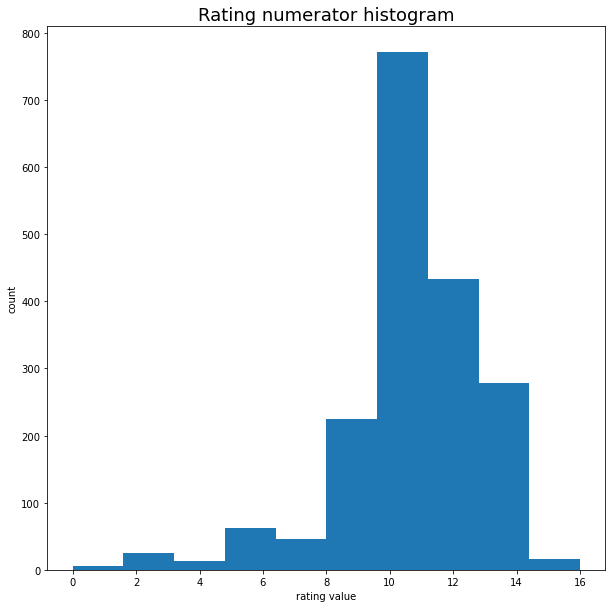

In [54]:
# distribuation of rating values
fig, ax = plt.subplots()

plt.hist(df_copy.rating_numerator);
plt.title('Rating numerator histogram',fontsize=18);
ax.set_ylabel('count');
ax.set_xlabel('rating value');

ratings between 10-12 are the most repeated

#### Which are top 10 breeds that are most tweeted ?

In [55]:
df_copy.breed.value_counts().nlargest(10)


none                  287
golden_retriever      150
Labrador_retriever    103
Pembroke               90
Chihuahua              88
pug                    58
toy_poodle             46
chow                   45
Samoyed                40
Pomeranian             38
Name: breed, dtype: int64

In [56]:
#lets remove the none from statistics
df_copy.loc[df_copy['breed'] == 'none', 'breed'] = None
df_copy.breed.value_counts().nlargest(10)

golden_retriever      150
Labrador_retriever    103
Pembroke               90
Chihuahua              88
pug                    58
toy_poodle             46
chow                   45
Samoyed                40
Pomeranian             38
French_bulldog         31
Name: breed, dtype: int64

<AxesSubplot:ylabel='breed'>

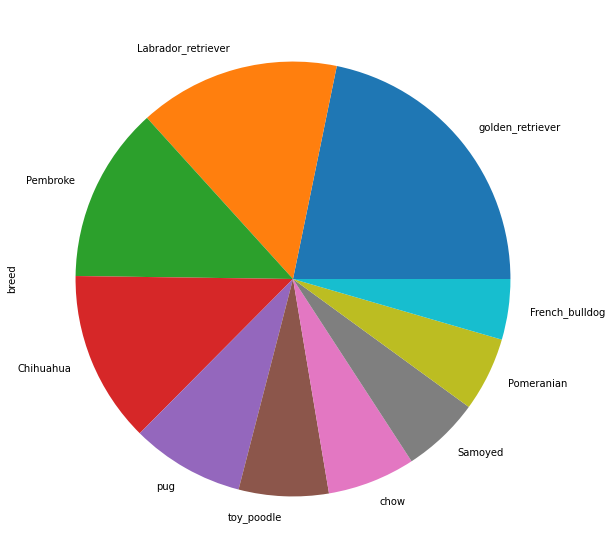

In [57]:
df_copy.breed.value_counts().nlargest(10).plot(kind = 'pie')


#### what are the top 10 breeds that have the highest favorite counts

In [58]:
df_copy.groupby('breed')['favorite_count'].mean().sort_values(ascending=False).nlargest(10)


breed
black-and-tan_coonhound    33911.000000
Saluki                     24060.000000
Bedlington_terrier         21153.166667
French_bulldog             18416.806452
Bouvier_des_Flandres       18032.000000
Afghan_hound               17326.666667
flat-coated_retriever      16791.625000
Irish_water_spaniel        16400.000000
English_springer           15632.222222
Leonberg                   14934.333333
Name: favorite_count, dtype: float64

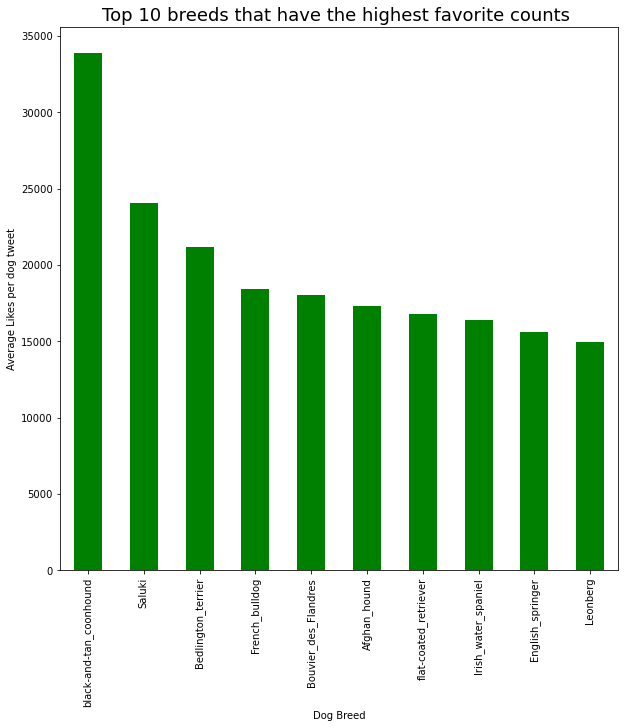

In [59]:
favorite= df_copy.groupby('breed')['favorite_count'].mean().sort_values(ascending=False).nlargest(10)
favorite.plot(kind='bar',color='green')
plt.title("Top 10 breeds that have the highest favorite counts ",fontsize=18)
plt.ylabel("Average Likes per dog tweet")
plt.xlabel("Dog Breed");

so the black-and-tan_coonhound seems to be the favourite dog in our dataframe!

##### Which are top 10 breeds that are highest rated  ?

In [60]:
df_copy.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False).nlargest(10)


breed
clumber                    16.000000
black-and-tan_coonhound    14.000000
Bouvier_des_Flandres       13.000000
Saluki                     12.500000
briard                     12.333333
Tibetan_mastiff            12.250000
Border_terrier             12.142857
silky_terrier              12.000000
standard_schnauzer         12.000000
Irish_setter               11.750000
Name: rating_numerator, dtype: float64

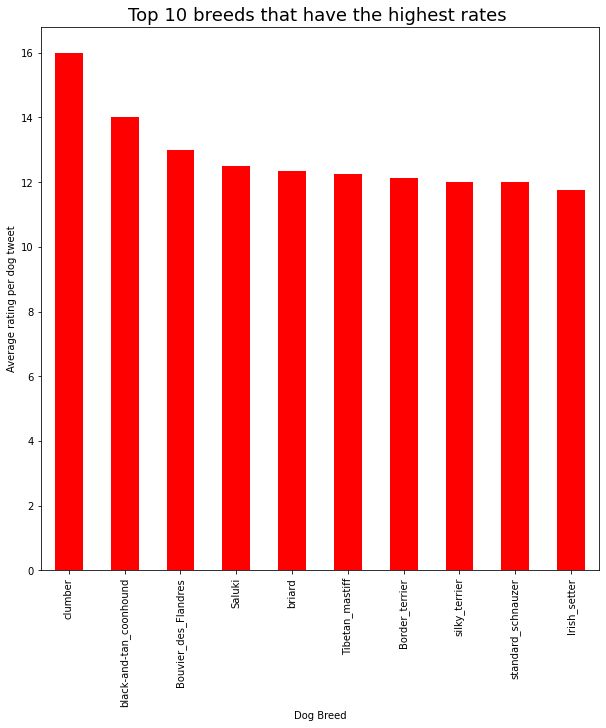

In [61]:
top_rated=df_copy.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False).nlargest(10)
top_rated.plot(kind='bar',color='red')
plt.title("Top 10 breeds that have the highest rates ",fontsize=18)
plt.ylabel("Average rating per dog tweet")
plt.xlabel("Dog Breed");

so the dog with the highest rating in average is clumber 

##### is there any correlation betweenfavorite counts and retweet counts ?

Text(0, 0.5, 'Retweet Count ')

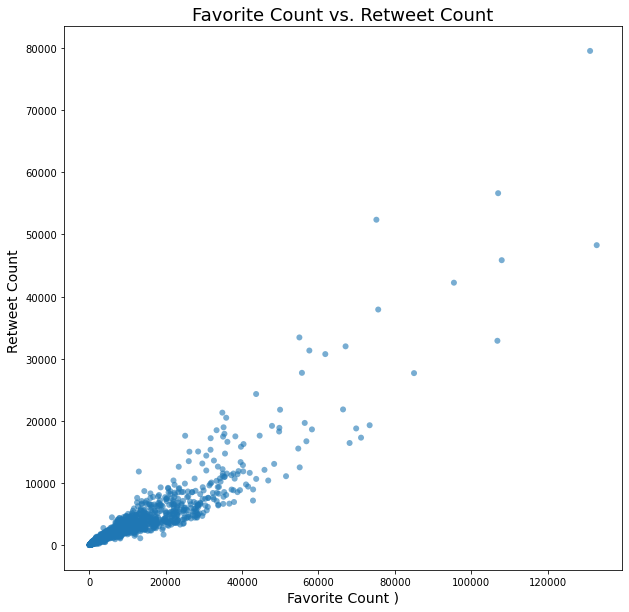

In [62]:
plt.scatter(df_copy['favorite_count'], df_copy['retweet_count'], edgecolor = 'None', alpha = 0.6)

# title and labels
plt.title('Favorite Count vs. Retweet Count', fontsize = 18)
plt.xlabel('Favorite Count )', fontsize = 14)
plt.ylabel('Retweet Count ', fontsize = 14)

In [63]:
df_copy['favorite_count'].corr(df_copy['retweet_count'])

0.9113738876204494

there is strong positive correlation between retweet counts and favorite counts. which make sense

#### What is the most common step?


In [64]:
df_copy.step.value_counts()


none       1582
pupper      192
doggo        68
puppo        23
floofer       8
Name: step, dtype: int64

In [65]:
known_step = sum(df_copy.step != 'none')
tweets_with_step = round(known_step* 100 / df_copy.shape[0])
print("Number of tweets with step:  {}".format(known_step ))
print("Percentage of tweets:          {}%".format(round(tweets_with_step, 3)))

Number of tweets with step:  291
Percentage of tweets:          16%


<AxesSubplot:ylabel='step'>

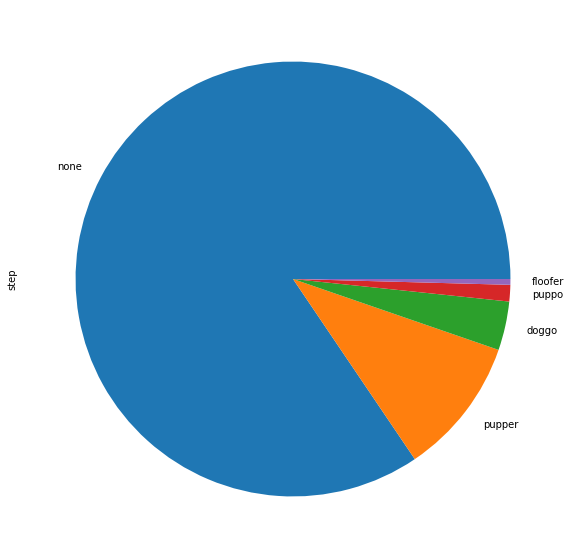

In [66]:
df_copy.step.value_counts().plot(kind = 'pie')


most tweets are without step , for rest pupper is the most frequent